In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

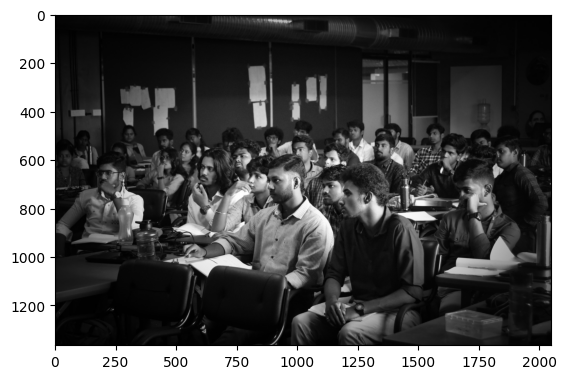

In [2]:
image = cv2.imread('/Users/pravinpb/pycode/openCV/workshop/assets/classroom.jpg', 0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [3]:
def find_contours(image, binary_threshold=13):

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image = image

    ret, thresh = cv2.threshold(image, binary_threshold, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    image_contors = image.copy()
    cv2.drawContours(image_contors, contours, -1, (0,255,0), 2)
    return image_contors, contours, hierarchy

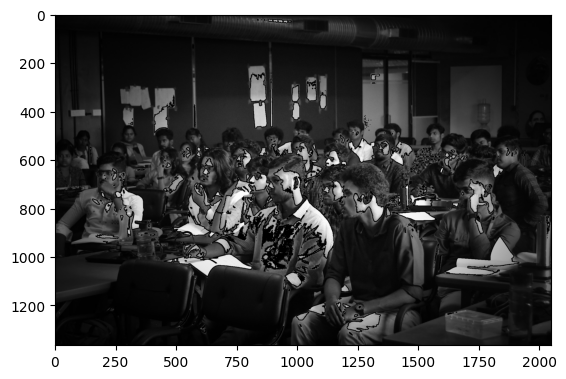

In [4]:
contor_image, contours, hierarchy = find_contours(image,133)
plt.imshow(cv2.cvtColor(contor_image, cv2.COLOR_BGR2RGB))

In [5]:
def find_blobs(image, min_blob_size=100):
    image_with_contours, contours, _ = find_contours(image.copy())
    mask = np.zeros_like(image, np.uint8)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > min_blob_size and area < 200:
            area = cv2.drawContours(mask, [cnt], 0, 255,-1)
    return mask

In [6]:


def find_blobs(image, min_blob_size=100):
    # Copy the image to avoid modifying the original
    image_copy = image.copy()
    
    # Find contours in the copied image
    contours, _ = cv2.findContours(image_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize a counter for the number of valid blobs
    num_valid_blobs = 0
    
    # Create a mask filled with zeros a
    mask = np.zeros_like(image, dtype=np.uint8)
    
    # Iterate over each contour
    for cnt in contours:
        # Calculate the area of the contour
        area = cv2.contourArea(cnt)
        
        # Check if the area is within the specified range
        if min_blob_size <= area <= 200:
            # Increment the counter for valid blobs
            num_valid_blobs += 1
            
            # Draw the contour on the mask
            cv2.drawContours(mask, [cnt], -1, 255, -1)
    
    # Return the number of valid blobs and the mask
    return num_valid_blobs, mask

# Example usage
image = cv2.imread('path_to_your_image.jpg')
num_blobs, mask = find_blobs(contor_image, min_blob_size=10)
print(f"Number of Blobs found: {num_blobs}")
cv2.imshow('Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()



[ WARN:0@2.527] global loadsave.cpp:248 findDecoder imread_('path_to_your_image.jpg'): can't open/read file: check file path/integrity


Number of Blobs found: 0


: 

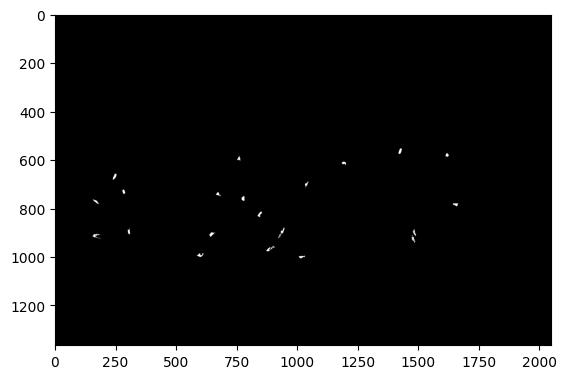

In [14]:
blob_contors = find_blobs(contor_image, 100)
plt.imshow(cv2.cvtColor(blob_contors, cv2.COLOR_BGR2RGB))